# Machine Learning

## HSE, 2024-25

### Home Assignment #2. Pandas. Matplotlib

The assignment was completed by: _(insert your first and last name)_

### General information

__Publication date:__ 15.02.2025

__Deadline:__ 04:00 28.02.2025

### Grading and penalties

Each task is assessed with 3 points.

The grade for HA is calculated according to the following formula:

$$
s_{\text{pandas}} \times 10/48 ,
$$

where $s_{\text{pandas}}$  — is the number of points you have scored in total on the tasks.

Submitting a task late will incur a penalty of 1 point per day on the final grade for the task, but the delay cannot be more than 3 days.

**Note:** This homework assignment contains several tasks that may earn bonus points. Bonus points are added to the regular points, and it may turn out that your final score will be greater than 10. In this case, this will be your score. So, for this HW **you can** get more than 10

__WARNING!__ Homework must be completed independently. Assistance from classmates or third parties in solving homework assignments is not permitted. "Similar" solutions are considered plagiarism, and all involved students—including those who copied—will receive no credit for it. The use of generative models (such as ChatGPT and others) in solving homework assignments, beyond using them for reference and educational purposes, to generate assignment code, is considered plagiarism, and such homework will be graded as 0 points.

### Submission format

You upload your solution using the link provided in the telegram channel. You need to upload a file with the extension .ipynb (Python notebook)

### About the assignment

In this homework assignment you will practice in using pandas and matplotlib libraries!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Please note that in almost all tasks you will need to write some text in the form of a conclusion/result/some kind of summary. Please do not be lazy and write your conclusions in ***detail***, a significant part of the points will be awarded specifically for conclusions, since they are really important in data analysis. Thus, answer any task formulated in the form of a question with text, supporting your words with written and executed code. Write the text of your conclusions/comments in separate cells using the text editor Jupyter Notebook/Google Colab, if necessary, use *highlighting* tools.

While solving problems where you need to do some kind of filter, slice, selection, or other action with data, it is prohibited to use loops (`for`, `while`) and the `if` operator.

Also, in some tasks you will be required to construct graphs. Each constructed graph must be beautifully designed - for this you need to at least indicate its name, and also note what is shown on each of the axes. Please do not neglect the design, since this is also assessed in this HW.

*Functions that may be useful when designing charts: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` and others*

### 1

In this homework assignment, you will work with passenger data from the Titanic, which we briefly reviewed earlier in the lesson.

A description of the data, as well as the data itself (where it should be downloaded from) can be found at the following link:

https://www.kaggle.com/c/titanic/data

Open the data file ("train.csv") in your notebook. What size is the table? Print the first 5 and last 5 lines.

In [3]:
data = pd.read_csv("train.csv")

#Table size (rows, columns)
print(f"Size of the table: {data.shape}")

#First 5 lines
print("\nFirst 5 lines:")
print(data.head().to_string())

#Last 5 lines
print("\nLast 5 lines:")
print(data.tail().to_string())

Size of the table: (891, 12)

First 5 lines:
   PassengerId  Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S

Last 5 lines:
    

### 2

For each feature in the data, indicate the type of this feature.

PassengerId	(int64) - numeric  
Survived:	(int64) - binary сategorical  
Pclass:	(int64) - categorical  
Name:	(object) - numeric (can't be used for ML modeling, only for new features generation)  
Sex:	(object) - сategorical (could be encoded)  
Age:	(float64) - numeric  
SibSp:	(int64) - numeric  
Parch:	(int64) - numeric  
Ticket:	(object) - nominal categorical (can't be used for ML modeling, only for new features generation)  
Fare:	(float64) - numeric  
Cabin:	(object) - nominal categorical (can't be used for ML modeling, only for new features generation)  
Embarked:	(object) - сategorical (could be encoded)   

### 3

Come up with three data analysis problems that could be solved for this dataset:

1. The regression problem - in other words, predicting a certain integer result for each object
2. The task of classification - in other words, assigning each object to one of two or more predetermined classes (groups)
3. The task of clustering - in other words, dividing all objects into an unknown number of groups based on the principle of their similarity to each other

*You can read more about what regression, classification, and clustering problems are, for example, on Wikipedia. This is also described in simple language and with a specific example in this [article](https://habr.com/ru/company/simbirsoft/blog/565396/) (at the beginning)*

The regression problem: predicting the **Age** of a passenger based on other characteristics.  

The task of classification: predicting of the **Survived** (0 = Died, 1 = Survived) based on features like Pclass, Sex, Age, Fare, and Embarked.  

The task of clustering: identifying natural passenger groups based on socioeconomic characteristics (for example, could be upper, middle and lower classes).


### 4

What is the proportion of passengers who survived the catastrophe? What is the proportion of men and women among the survivors?

In [ ]:
#Proportion of passengers who survived
all_passengers = len(data)
all_survivors = len(data[data["Survived"] == 1])
survival_proportion = (all_survivors / all_passengers) * 100

print(f"Proportion of passengers who survived: {survival_proportion:.2f}%")

#Proportion of men and women among survivors
female_survivors = len(data[(data["Survived"] == 1) & (data["Sex"] == "female")])
male_survivors = len(data[(data["Survived"] == 1) & (data["Sex"] == "male")])

print(f"Proportion of women among survivors: {(female_survivors / all_survivors)*100:.2f}%")
print(f"Proportion of men among survivors: {(male_survivors / all_survivors)*100:.2f}%")

Proportion of passengers who survived: 38.38%
Proportion of women among survivors: 68.13%
Proportion of men among survivors: 31.87%


### 5

How many passengers were traveling in each class? Who were more in the most crowded class - men or women?

In [ ]:
#Passengers in each class
passenger_by_class = data["Pclass"].value_counts().sort_index()

print("Passengers were traveling in each class:")
print(passenger_by_class)

#The most crowded class
most_crowded_class = passenger_by_class.idxmax()
most_crowded_class_count = passenger_by_class.max()

print(f"The most crowded class was: {most_crowded_class} ({most_crowded_class_count} passengers)")

#Men and women in the most crowded class
men_crowded_class = len(data[(data["Pclass"] == most_crowded_class) & (data["Sex"] == "male")])
women_crowded_class = len(data[(data["Pclass"] == most_crowded_class) & (data["Sex"] == "female")])

print(f"There were {men_crowded_class} men and {women_crowded_class} women in the most crowed class")

if men_crowded_class > women_crowded_class:
    print("There were more menin the most crowded class")
else:
    print("There were more women in the most crowded class")

Passengers were traveling in each class:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64
The most crowded class was: 3 (491 passengers)
There were 347 men and 144 women in the most crowed class
There were more menin the most crowded class


### 6

Print the minimum, average and maximum amount of money that passengers paid for travel. Repeat your actions only for those passengers who boarded the ship in Southampton. Print histograms showing the distribution of ticket prices depending on the boarding location. What can you say based on the results you get?

Minimum amount: $0.00
Average amount: $32.20
Maximum amount: $512.33

Minimum amount (Southampton): $0.00
Average amount (Southampton): $27.08
Maximum amount (Southampton): $263.00




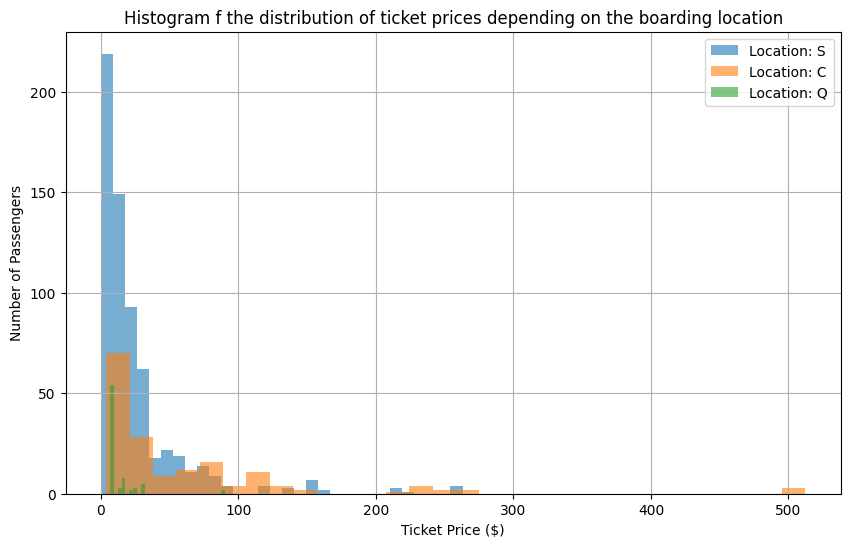

In [ ]:
#The minimum, average and maximum amount of money that passengers paid for travel
fare = data["Fare"]

print(f"Minimum amount: ${fare.min():.2f}")
print(f"Average amount: ${fare.mean():.2f}")
print(f"Maximum amount: ${fare.max():.2f}")

#Same for those passengers who boarded the ship in Southampton
southampton_passengers = data[data["Embarked"] == "S"]
southampton_passengers_fare = southampton_passengers["Fare"]

print(f"\nMinimum amount (Southampton): ${southampton_passengers_fare.min():.2f}")
print(f"Average amount (Southampton): ${southampton_passengers_fare.mean():.2f}")
print(f"Maximum amount (Southampton): ${southampton_passengers_fare.max():.2f}")

print("\n")

#Histograms showing the distribution of ticket prices depending on the boarding location
plt.figure(figsize=(10, 6))

for location in data["Embarked"].dropna().unique():
    subset = data[data["Embarked"] == location]
    plt.hist(
        subset["Fare"],
        bins=30,
        alpha=0.6,
        label=f"Location: {location}"
    )

plt.title("Histogram f the distribution of ticket prices depending on the boarding location")
plt.xlabel("Ticket Price ($)")
plt.ylabel("Number of Passengers")

plt.legend()
plt.grid(True)
plt.show()

Conclusions:

*   Most passengers had low-cost tickets in the $0 - $50 range.
*   The majority of passengers boarded from Southampton (S).
*   All passengers from Queenstown (Q) paid less than $100.
*   There is a wide spread of ticket prices among passengers who boarded from Cherbourg (C), indicating a mix of different classes.

### 7

Do all the features provide useful information? Why? Get rid of unnecessary columns. Justify your choice.

Not all features provide useful information for analysis. Some columns can be removed, such as **PassengerId**, **Name**, **Ticket**, and **Cabin**, as they are useful only for internal management and do not contribute useful insights for the data analysis.

In [ ]:
#Removing unuseful columns
data_clean = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

print("PassengerId, Name, Ticket, Cabin could be removed. After removing:")
print("\n")
print(data_clean.head())

PassengerId, Name, Ticket, Cabin could be removed. After removing:


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


### 8

Are there any gaps in the data? If yes, in which columns? How many gaps are there in each of them?

In [ ]:
#Sum of gaps in each column
missing_values = data.isnull().sum()

print("Gaps in the each column:")
print(missing_values[missing_values > 0])

Gaps in the each column:
Age         177
Cabin       687
Embarked      2
dtype: int64


### 9

Think about how to fill in the gaps in each column and perform it. Check that there are no gaps left anywhere.

In [ ]:
#Fill gaps with default values
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Cabin"] = data["Cabin"].fillna("Unknown")
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

#Check that there are no gaps left anywhere
missing_values_after_filling = data.isnull().sum()
print("Gaps in the each column:")
print(missing_values_after_filling[missing_values_after_filling > 0])

Gaps in the each column:
Series([], dtype: int64)


### 10

Calculate how strongly the price of a ticket and the age of passengers correlate with each other. Also check the presence of this connection visually (building a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) will help you with this). What conclusions can be drawn?

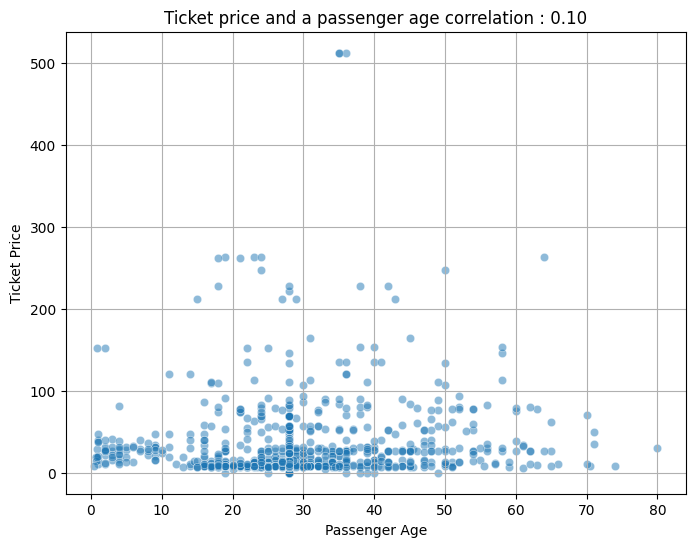

In [ ]:
import seaborn as sns

#Ccorrelation between age and fare
correlation = data["Age"].corr(data["Fare"])

#Displaying with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["Age"], y=data["Fare"], alpha=0.5)

plt.title(f"Ticket price and a passenger age correlation : {correlation:.2f}")
plt.xlabel("Passenger Age")
plt.ylabel("Ticket Price")
plt.grid(True)

plt.show()


**Conllusion: there is no strong relationship between age and ticket price.**

### 11

Is it true that passengers with more expensive tickets survived more often? Is there a dependence of survival on class? Give reasons for your answer!

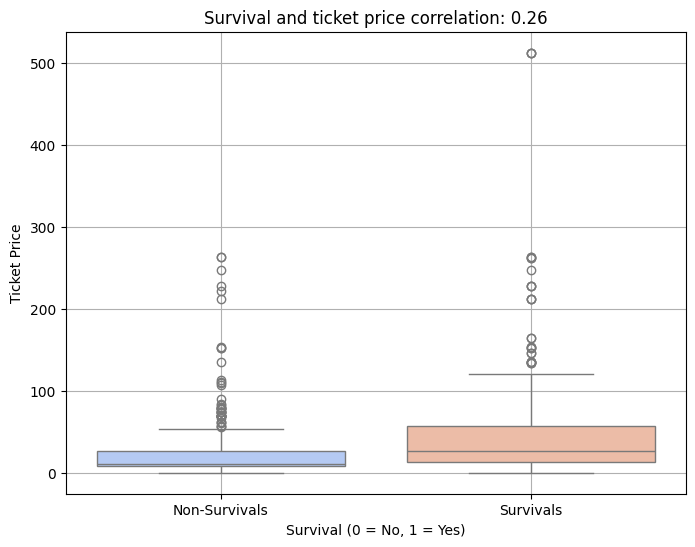

In [ ]:
#Correlation between Survived and Fare
correlation = data["Survived"].corr(data["Fare"])

#Box Plot
plt.figure(figsize=(8, 6))
plt.xticks([0, 1], ["Non-Survivals", "Survivals"])
sns.boxplot(
    x="Survived",
    y="Fare",
    hue="Survived",
    data=data,
    palette="coolwarm",
    legend=False
)

plt.title(f"Survival and ticket price correlation: {correlation:.2f}")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Ticket Price")
plt.grid(True)

plt.show()

The non-survivors box (0) is lower and narrow, so:
*   Most non-survivors paid less than $50 for tickets
*   Almost all of them were 3rd-class passengers

The box for survivors (1) is higher and wider, so:
*   All survivors paid more than $100 for tickets
*   The median ticket price for survivors is higher

**It confirms that wealthier passengers had better survival chances.**

### 12

Creating new features (feature engineering) is one of the main means of improving the quality of machine learning algorithms at the data processing stage, and is also a great way to improve the quality of your conclusions from your analysis in general! Add a column to the table that will show how many relatives sailed with the passenger on the ship, including himself. How can such feature be useful?

In [ ]:
#New feature "familyCount" shows the famyly size including siblings, spouses, parents and children and the passenger itself
data["familyCount"] = data["SibSp"] + data["Parch"] + 1

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1


This feature could be useful to analyze survival chances based on the social behavior.

### 13

Now come up with your own feature that can be useful for analysis (carries some information), and add it to the table. Be sure to give reasons why your feature is useful.

**I would add a new feature "HasChild", which identifies whether a passenger was traveling with at least one child (age < 18) on the same ticket.**

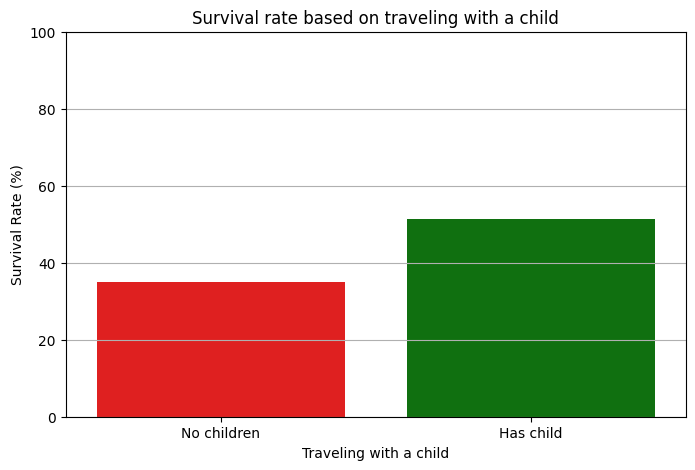

In [ ]:
#Create a "HasChild" feature (1 if traveling with at least one child, 0 - otherwise)
data["HasChild"] = data.groupby("Ticket")["Age"].transform(lambda x: (x < 18).any()).astype(int)

#Survival rates for this type of passengers
child_survival_rates = data.groupby("HasChild")["Survived"].mean() * 100

# Plot the survival rates
plt.figure(figsize=(8, 5))
sns.barplot(
    x=child_survival_rates.index,
    y=child_survival_rates.values,
    hue=child_survival_rates.index,
    palette=["red", "green"],
    legend=False
)
plt.xticks([0, 1], ["No children", "Has child"])
plt.xlabel("Traveling with a child")
plt.ylabel("Survival Rate (%)")
plt.title("Survival rate based on traveling with a child")

plt.ylim(0, 100)
plt.grid(axis="y")

plt.show()

**It is visible that passengers wich at least one child had more chances to survive.**

### 14

Come up with some interesting task to analyze the proposed data and solve it.

Creativity is appreciated in this task and may earn you 1-2 bonus points!

*Clue. For example, what was the most popular surname on the ship? (It’s better not to use this example, so come up with something of your own)*

I would check if third-class passengers had more children than second- and first-class passengers.

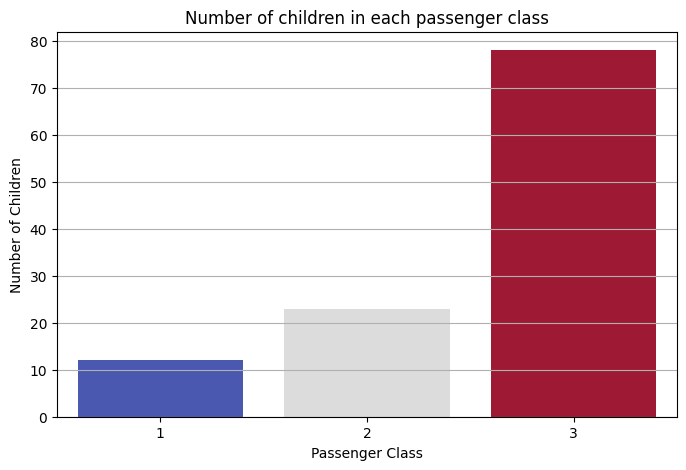

In [ ]:
#Count the number of children in the each class
children_by_class = data[data["Age"] < 18].groupby("Pclass")["PassengerId"].count()

children_by_class_df = children_by_class.reset_index()

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Pclass",
    y="PassengerId",
    hue="Pclass",
    data=children_by_class_df,
    palette="coolwarm",
    legend=False
)

plt.xlabel("Passenger Class")
plt.ylabel("Number of Children")
plt.title("Number of children in each passenger class")
plt.grid(axis="y")

plt.show()

**Indeed, third class has the most children, followed by second and first class.**

### 15

Construct histograms of the distribution of **numerical** features. Is there any difference between them? How could this be bad from a data analytics perspective and from a machine learning perspective? Normalize the numerical features and see how the situation has changed. What conclusions can be drawn from this?

The depth of answering the theoretical questions in this assignment is appreciated and may earn you 1-2 bonus points!

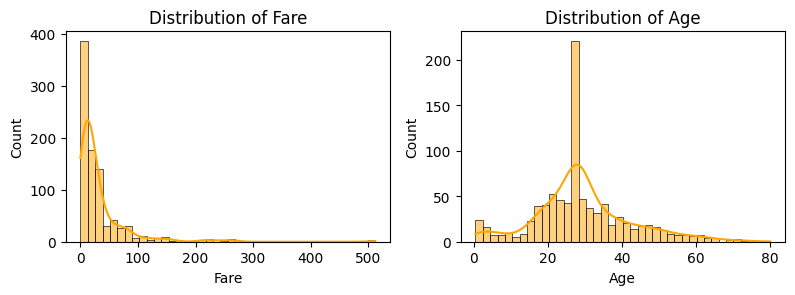

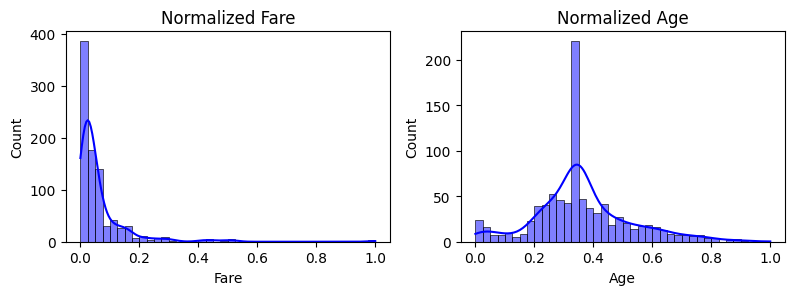

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ["Fare", "Age"]

# Before the normalization
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(
        data[feature].dropna(),
        kde=True,
        bins=40,
        color="orange"
    )
    plt.title(f"Distribution of {feature}")
plt.tight_layout()

plt.show()

# Normalization
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_features] = scaler.fit_transform(data[numerical_features])

# Adter the normalization
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(
        data_normalized[feature].dropna(),
        kde=True,
        bins=40,
        color="blue"
    )
    plt.title(f"Normalized {feature}")
plt.tight_layout()

plt.show()

data = data_normalized


How does it look before normalization:
- **Fare** is highly right-skewed (values range from 0 to 500)
- **Age** has a strong peak around 23-24 years old

Many machine learning models (e.g., Linear Regression, Logistic Regression, LDA, PCA) work better when features follow a normal distribution.

How does it look after normalization:
- Now both **Fare** and **Age** are in the range [0,1]
- **Fare** is still highly right-skewed

Normalization helps ensure that both features contribute equally to ML models. Without it, ML models would give more weight to **Fare** because it has a bigger range than **Age**. But we also see that **Fare** is still highly right-skewed even after the normalization.

### 16

Are there any categorical features in the data that take string values ​​rather than numbers? If so, this could be a serious problem for many algorithms, so encode the categorical features so that any algorithm can be applied to the data.

The categorical features are:
*   Sex (Male, Female)
*   Embarked (S, C, Q)

In [ ]:
# Map categorical Embarked to numerical values [0,1]
data["Embarked"] = data["Embarked"].map({"S": 0, "Q": 1, "C": 2})

# Map categorical Sex to numerical values [0,1,2]
data["Sex"] = data["Sex"].map({"female": 0, "male": 1})

# Check there are only numerical values in Embarked and Sex
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyCount,HasChild
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,Unknown,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,Unknown,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,Unknown,0,1,0


## Bonus part for machine learning (up to 5 bonus points)

### 17

Solve the binary classification problem of predicting the survival of a passenger (the target variable $y$ is the Survived column; the task is for each object (passenger), from its feature space (remaining columns) to predict whether he will survive or not based on available data).

In order to do this, separate the target variable ''Survived'' from the training sample and train some machine learning algorithm for classification on them (for beginners, we can recommend reading about perhaps the simplest and most understandable algorithm for initial development - kNN) . Using the algorithm you have chosen and trained, then build a prediction on the test set, having previously processed it in the same way as the training one.

In [ ]:
# Dataset check
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyCount,HasChild
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Drop columns with string data
train_data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Separate features (X) and target (y)
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

# Split into test and train
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy_knn:.2%}")

Model Accuracy: 82.12%


Based on the data you worked with, a competition was created on Kaggle, aimed at aspiring Data Scientists: https://www.kaggle.com/c/titanic. You are invited to participate in it - if you have reached this point, then there is absolutely nothing left for this. Register on Kaggle and accept the competition rules. If you already have an answer for the test sample that you want to send for evaluation and get into the leaderboard, you need to add it to the .csv file and format it as necessary. To do this, in the data tab (https://www.kaggle.com/c/titanic/data) there is an example of what this file should look like (“gender_submission.csv”). You can download and study it. For your convenience, below is the code that allows you to generate a file for sending.

In [ ]:
subm = pd.read_csv('gender_submission.csv')
subm['Survived'] = prediction_test

FileNotFoundError: [Errno 2] No such file or directory: 'gender_submission.csv'

In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)

Submit the file for measurement using the “Submit Predictions” button. The metric used in competitions is accuracy. What was the result? Try to improve it! For example, select the form of features that would be most useful for prediction (feature selection) or create new features (feature generation).

### Important!

You can find a lot of useful information on this additional task in https://www.kaggle.com/c/titanic/kernels and https://www.kaggle.com/c/titanic/discussion!

But do not plagiarize the code from there